# 6a: Stopped-flow chemiluminescence detection of bleach.

## Objectives
Household bleach is commonly used to clean stains in clothing or sanitize areas where food maybe prepared. While drinking household bleach (6% sodium hypochlorite) straight out of the bottle is not considered a smart thing to do, once diluted it is a very effective way of killing pathogens in water. In this experiment, you will be using a rapid mixing technique along with chemiluminescence to accurately measure bleach concentrations in water.

## Introduction
The World Health Organization believes the availability of safe drinking water is one of the most pressing issues in today’s society. While boiling water can be an effective method of making itsafe to drink, the addition of chlorine, in the form of sodium hypochlorite, can insure water remains safe for extended periods after initial treatment. To maintain efficacy the concentration of bleach must be high enough to be lethal to pathogens yet low enough to be non-corrosive to storage containers and palatable for human consumption. This experiment examines a kinetic method of detecting bleach in water.

It is thought that luminol reacts with hydrogen peroxide in base to produce an unstable diazaquinone, which, in turn, reacts with certain dioxygen species in the presence of catalysts to generate and excited state of 3-aminophthalate.$^{1-3}$ The excited state relaxes to its ground state with the emission of blue light. The complete mechanism and the identity of some of the intermediates remain uncertain but the reaction is generally accepted to proceed according to therough scheme below.$^{1-3}$

### Scheme 1 
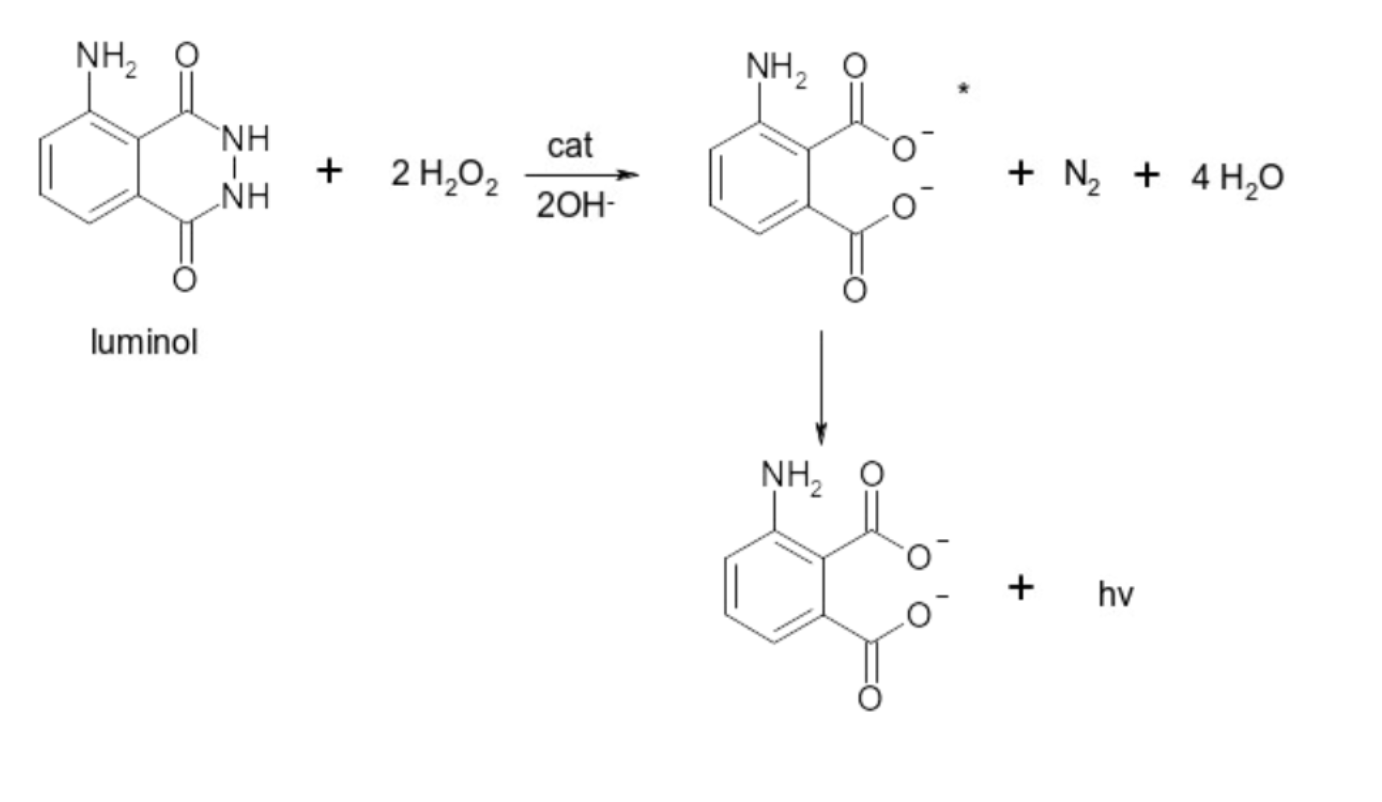


## Introduction cont.
Catylysts for the reaction include iron, for example heme-proteins in blood, and other trace metal ions. The reaction between luminol and peroxide is also accelerated using samples of sodiumhypochlorite.$^{3,4}$ (See, you can actually learn something by watching CSI; cleaning your crimescene with bleach masks the presence of blood.$^{4}$) For high concentrations of hydrogen peroxide,luminal becomes the limiting reagent. Moderate concentrations of NaClO allow decompositionof the luminol/hydrogen peroxide intermediate to become the rate determining step. To completethis experiment you will determine the order of reaction with respect to luminal, H$_{2}$O$_{2}$ and NaClO (bleach) based on the initial rates method.$^{5}$ These data will also allow you to determinean initial rate constant for reaction. You will then test your rate law by analyzing the entire decaytrace. With this information in hand you will design an experimental procedure to measure theconcentration of bleach and determine the limit of detection under these conditions

# Finding the Rate Law with Initial Rates

The rate constant is found by performing the intial rates method. The innitial rate of a reaction is found by fitting a linear slope to the beginning section of the decay. This linear slope will give you the intial rate, which can be used to calculate the rate law and rate constant. 

Using your known concentrations and the initial rate obtained from the linear fit, you can determine the order of the reaction: 

$$Initial Rate = k{[A]}^{x}{[B]}^{y}{[C]}^{z}$$

This process is visualized with interactive sliders below. 

### Using the Interactive Sliders

*The Vertical Correction Slider*: This slider is designed to trim off the inital data right before the peak and set the minimum voltage value to zero. Set the slider at the point right before the peak.  
The vertical correction is shown in the second graph. 

*The Range slider*: This slider will create a linear fit using the data within the specified range. Select the range that you will fit the linear slope to. The fitted data and slope is shown in the 3rd graph. 

$\color{red}{\text{Note: The sliders work the best when you just click where you want the slider to go. It doesn't always respond when you click and drag.}}$ 


 #### Use the install below if not already installed

In [3]:
!pip install ipympl

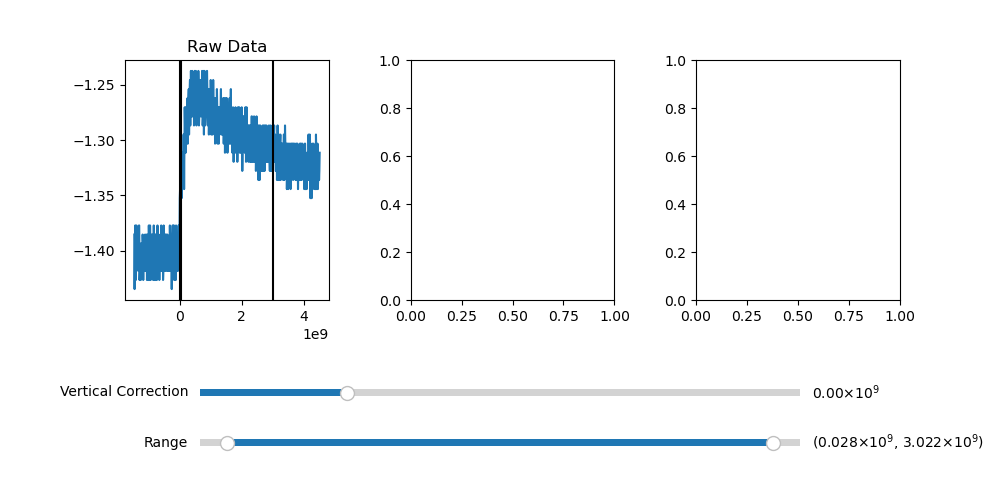

In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider
from matplotlib.widgets import Slider
from scipy.optimize import curve_fit

time,voltage  = np.loadtxt("Luminol-1.csv", delimiter=',', unpack = True, skiprows=22, usecols=(2,3)) #Import the file
img = np.loadtxt("Luminol-1.csv", delimiter=',', unpack = True, skiprows=22, usecols=(2,3)) #create fake image of file to work with matplotlib

fig, axs = plt.subplots(1, 3, figsize=(10, 5)) #set plot size
fig.subplots_adjust(bottom=0.40)
fig.subplots_adjust(wspace=0.40)
axs[0].plot(time, voltage)
axs[0].set_title('Raw Data')
#------------------------------------------------------------------------------------------------
# TRIM the data to set the min voltage to zero---------------------------------------------------
trim_ax = fig.add_axes([0.20, 0.2, 0.60, 0.03])
trim_slider = Slider(trim_ax, "Vertical Correction", img.min(), img.max()) #define the values on the slider

trim_line = axs[0].axvline(trim_slider.val, color='k')

#range-------------------------------------------------------------------------------------------

slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Range", img.min(), img.max()) #states min and max of graph

# Create the Vertical lines on the graph
lower_limit_line = axs[0].axvline(slider.val[0], color='k')
upper_limit_line = axs[0].axvline(slider.val[1], color='k')
#----------------------------------------------------------------------------------

def update(val):
    
    trim_line.set_xdata(trim_slider.val)
    axs[1].cla()  
    indextrim=min(range(len(time)), key=lambda i: abs(time[i]-trim_slider.val))
    plt.plot(time[:indextrim],voltage[:indextrim])
    initialAveragetrim = np.average(voltage[:indextrim]) #this calculates the average value for the initial section of voltage

    voltageAdj = voltage - initialAveragetrim
    axs[1].plot(time,voltageAdj) 
    axs[1].set_title('Data Adjusted to Zero')
    lower_limit_line.set_xdata([val[0], val[0]])
    upper_limit_line.set_xdata([val[1], val[1]])
    axs[2].cla() 
    
    indexl=min(range(len(time)), key=lambda i: abs(time[i]-slider.val[0]))
    indexh=min(range(len(time)), key=lambda i: abs(time[i]-slider.val[1]))
    
    axs[2].plot(time,voltageAdj)
    axs[2].plot(time[indexl:indexh],voltageAdj[indexl:indexh])
    
    fig.canvas.draw_idle()
    m, b = np.polyfit(time[indexl:indexh],voltageAdj[indexl:indexh], 1) #slope is m value
  
    axs[2].plot(time, m*time + b, label="slope = {}".format(m))
    axs[2].legend(loc = 'upper left', fontsize="7")
    axs[2].set_ylabel("Voltage")
    axs[2].set_xlabel("time")
    axs[2].set_title('Fitted Data')

    plt.legend()
slider.on_changed(update)
trim_slider.on_changed(update)
plt.autoscale()
plt.show()

### Calculating the orders and rate constant of the reaction

Once you have determined the initial rates for at least two of your trial combinations, you can determine the order of each reactant in the rate law. This can be done in a few comprehensive steps, but it helps to be organized! *Refer to Atkins Example 17A.2 on pages 728-729 for more detail*

It essentially all comes down to using this one equation:

log $v_{0}$ = log $k_{r, eff}$ + *a* log [$A_{0}$]

- $v_{0}$ = initial rate

- $k_{r, eff}$ = the effective rate constant, which helps simplify our initial calculations.

- *a* = order of reactant A

- [$A_{0}$] = initial concentrations of a reactant

Take a look at how the equation is formatted. Looks familiar? It has the form of y = b + mx! We can plot this equation and extract information from it. In this case, if we plot y versus x, the slope should give us the order, a,  of reactant A.

1) Determine which sets of your data have two reactant concentrations constant (we will call these reactants B and C), while a third reactant concentration is changing (we will call this reactant A). It is helpful to have at least two sets of data like this:

- one set with reactant A concentration changing and reactants B and C are constant
- one set with reactant A concentration changing, reactant B staying constant but at a different concentration than before, and reactant C constant and at the same concentration as before).
- more sets can be created by changing the concentration of B from the other sets, but keeping it constant while just A is changing.

2) Take the logs of the concentration of A as well as the logs of their corresponding initial rates. Plot log [$A_{0}$] in the x axis and log *$k_{r, eff}$* in the y-axis. The number of lines on your graph should equal the number of sets you have. **The slope of each line will give you the order of reactant A (*they should all be the same slope*)**. **The y-intercepts give you the log of the effective rate constant.**

Now, let's try to solve for the order of reactant B.

3) Plot log $k_{r, eff}$ from the previous graph versus log [$B_{0}$]. The x-axis would be the logs of the concentrations of B for your different sets. **The slope of this line will give you the order of reactant B.**

Repeat this process to find the order of reactant C. Once you have calculated the orders of each reactant, solve for the intial rate constant and simplify the rate law.